# <center>Rozwiązywanie układów równań</center>
# <center>Metody iteracyjne</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [1]:
import main
import helper_main
import scipy as sp
import numpy as np
import scipy.sparse.linalg as sp_linalg
import numpy.linalg as np_linalg
import matplotlib
import matplotlib.pyplot as plt
%load_ext memory_profiler

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z iteracyjnymi metodami rozwiązywania układów równań liniowych w postaci macierzowej. Metody iteracyjne, w przeciwieństwie do analitycznych, nie zwracają dokładnego rozwiązania, a jedynie jego przybliżenie. Przy spełnionych kryteriach, przybliżenia obliczane w kolejnych iteracjach są zbieżne do dokładnego rozwiązania. Metody iteracyjne znajdują swoje zastosowanie szczególnie przy dużych układach równań postaci: 
   
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Zdefiniuję funkcję *diag_dominant_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- macierz diagonalnie zdominowana $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy na przekątnej sa wieksze co do modułu od sumy pozostałych w danej kolumnie i wierszu)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje *is_diag_dominant* sprawdzającą czy zadana macierz jest diagonalnie zdominowana

***Zadanie 2***   
Zdefiniuję funkcję *symmetric_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- symetryczną macierz $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy symetryczne względnej przekątnej są sobie równe)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje is_symmetric sprawdzającą czy zadana macierz jest symetryczna

***Zadanie 3***   
Zdefiniuję następujące układy równań:

a) $\mathbf{A_1}$, $\mathbf{b_1}$: gdzie $\mathbf{A_1}$ jest macierzą o wymiarach $m \times m$, a $\mathbf{b_1}$ wektorem $m \times 1$, $m = 10$

b) $\mathbf{A_2}$, $\mathbf{b_2}$: gdzie $\mathbf{A_2}$ jest macierzą **diagonalnie zdominowaną** o wymiarach$m \times m$, a $\mathbf{b_2}$ wektorem $m \times 1$, $m = 10$
 
c) $\mathbf{A_3}$, $\mathbf{b_3}$: gdzie $\mathbf{A_3}$ jest macierzą **symetryczną** o wymiarach $m \times m$, a $\mathbf{b_3}$ wektorem $m \times 1$, $m = 10$   
 
**Wskazówka**: Do generacji macierzy użyj metody *random_matrix_Ab* z lab6 oraz metod *diag_dominant_matrix_A_b* i *symmetric_matrix_A_b*

In [2]:
m = 10
A1, b1 = helper_main.random_matrix_Ab(m)
A2, b2 = main.diag_dominant_matrix_A_b(m)
A3, b3 = main.symmetric_matrix_A_b(m)

***Zadanie 4***   
Zaimplementuj iteracyjną metodę *solve_jacobi*, rozwiązującą układ równań metodą Jacobiego zgodnie z dokumentacją w pliku *main.py*.
Szczegóły metody zostały przedstawione na wykładzie.

***Zadanie 5***   
Rozwiąż układ równań z Zadania 3 podpunkt a) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

7.95 µs ± 2.81 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
216 µs ± 55.6 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)


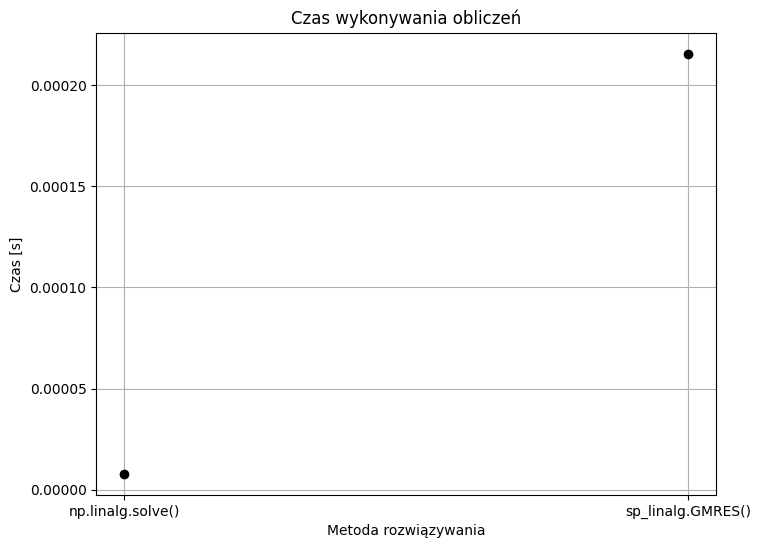

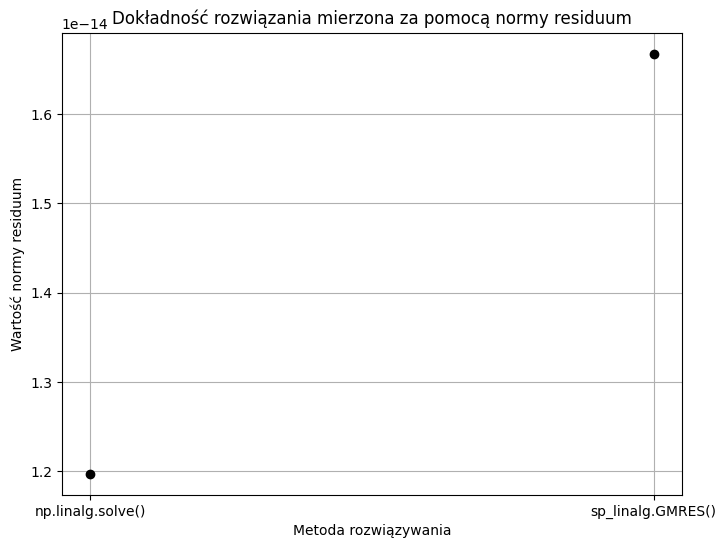

In [4]:
times = []
residuums = []
xticks = ['np.linalg.solve()', 'sp_linalg.GMRES()']

time = %timeit -r 10 -n 5 -o np.linalg.solve(A1, b1)
times.append(time.average)
x_solve = np.linalg.solve(A1, b1)
residuum = helper_main.residual_norm(A1, x_solve, b1)
residuums.append(residuum)

time = %timeit -r 10 -n 5 -o sp_linalg.gmres(A1, b1)
times.append(time.average)
x_gmres, info = sp_linalg.gmres(A1, b1)
residuum = helper_main.residual_norm(A1, x_gmres, b1)
residuums.append(residuum)

plt.figure(figsize=(8, 6))
plt.plot(xticks, times, 'ko')
plt.title('Czas wykonywania obliczeń')
plt.ylabel('Czas [s]')
plt.xlabel('Metoda rozwiązywania')
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(xticks, residuums, 'ko')
plt.title('Dokładność rozwiązania mierzona za pomocą normy residuum')
plt.ylabel('Wartość normy residuum')
plt.xlabel('Metoda rozwiązywania')
plt.grid()
plt.show()

Dla randomowej macierzy mogłem użyc jedynie funkcji solve oraz GMRES, ponieważ nie mają one ogarniczeń co do macierzy przekazywanej jako argument (poza takim, że macierz musi być kwadratowa). Jeżeli chodzi o ilość iteracji to sprawdziłem to wyświetlając wyniki dla poszczególnych wartości parametru $maxiter$. Jednak dla ilości iteracji ze zbioru {10, 100, 1000, 10000} nie zauważyłem różnicy w otrzymanym wyniku. Już dla 10 iteracji funkcja GMRES zwraca identyczny wyniki jak funkcja solve dlatego zdecydowałem się nie prezentować ich na wykresie. Czas wykonywania obliczeń jest zdecydowanie na korzyść funkcji solve. Podobnie jeżeli chodzi o dokładność rozwiązania czyli o wartość normy residuum.

***Zadanie 6***     
Rozwiąż układ równań z Zadania 3 podpunkt b) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

The slowest run took 4.84 times longer than the fastest. This could mean that an intermediate result is being cached.
15.9 µs ± 10.3 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
126 µs ± 42.8 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
68.7 µs ± 17.7 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)


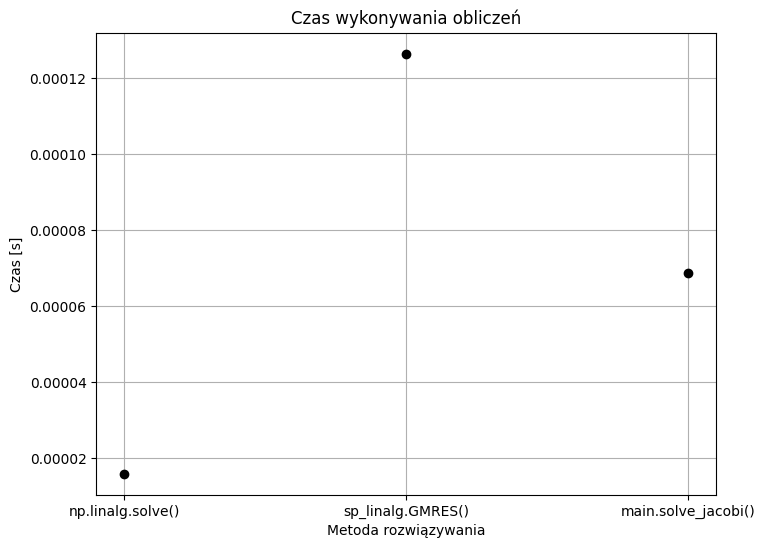

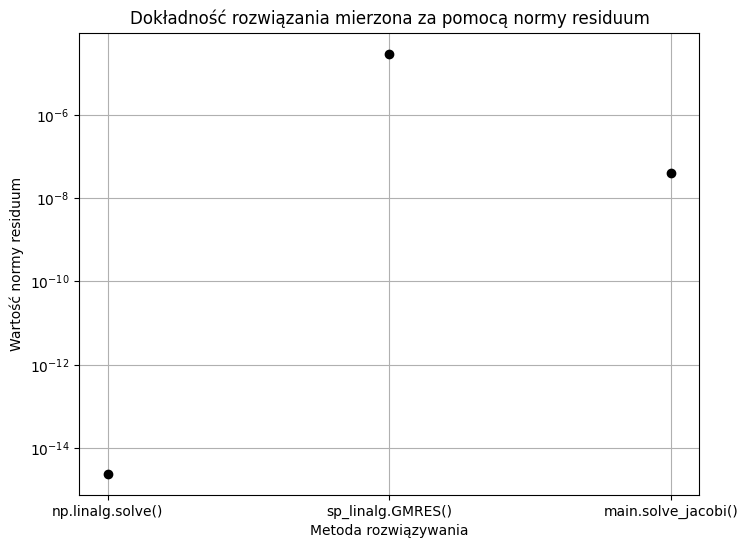

In [5]:
times = []
residuums = []
xticks = ['np.linalg.solve()', 'sp_linalg.GMRES()', 'main.solve_jacobi()']

time = %timeit -r 10 -n 5 -o np.linalg.solve(A2, b2)
times.append(time.average)
x_solve = np.linalg.solve(A2, b2)
residuum = helper_main.residual_norm(A2, x_solve, b2)
residuums.append(residuum)

time = %timeit -r 10 -n 5 -o sp_linalg.gmres(A2, b2)
times.append(time.average)
x_gmres, info = sp_linalg.gmres(A2, b2)
residuum = helper_main.residual_norm(A2, x_gmres, b2)
residuums.append(residuum)

time = %timeit -r 10 -n 5 -o main.solve_jacobi(A2, b2, np.zeros(shape=m))
times.append(time.average)
x_jacobi, nr_of_iterations = main.solve_jacobi(A2, b2, np.zeros(shape=m))
residuum = helper_main.residual_norm(A2, x_jacobi, b2)
residuums.append(residuum)

plt.figure(figsize=(8, 6))
plt.plot(xticks, times, 'ko')
plt.title('Czas wykonywania obliczeń')
plt.ylabel('Czas [s]')
plt.xlabel('Metoda rozwiązywania')
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(xticks, residuums, 'ko')
plt.title('Dokładność rozwiązania mierzona za pomocą normy residuum')
plt.ylabel('Wartość normy residuum')
plt.xlabel('Metoda rozwiązywania')
plt.grid()
plt.semilogy()
plt.show()

W tym przypadku mogłem dodatkowo użyć metody Jacobiego, ponieważ używana macierz współczynników była diagonalnie zdominowana. Jak poprzednio zbadałem czas oraz dokładność obliczeń. Czasowo znowu najlepiej wypadła metoda solve, potem metoda Jacobiego a na samym końcu GMRES. Tak samo jeżeli chodzi o dokładność obliczonego rozwiązania - funkcja solve wyznaczyła je najlepiej natomiast funkcja GMRES najgorzej. Ponownie, nawet dla 10 iteracji funkcja solve_jacobi oraz GMRES zwraca niemalże identyczny wynik jak funkcja solve.

***Zadanie 7***   
Rozwiąż układ równań z Zadania 3 podpunkt c) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

6.3 µs ± 2.45 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
122 µs ± 32.9 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
65.4 µs ± 14.1 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)
27.9 µs ± 3.21 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)


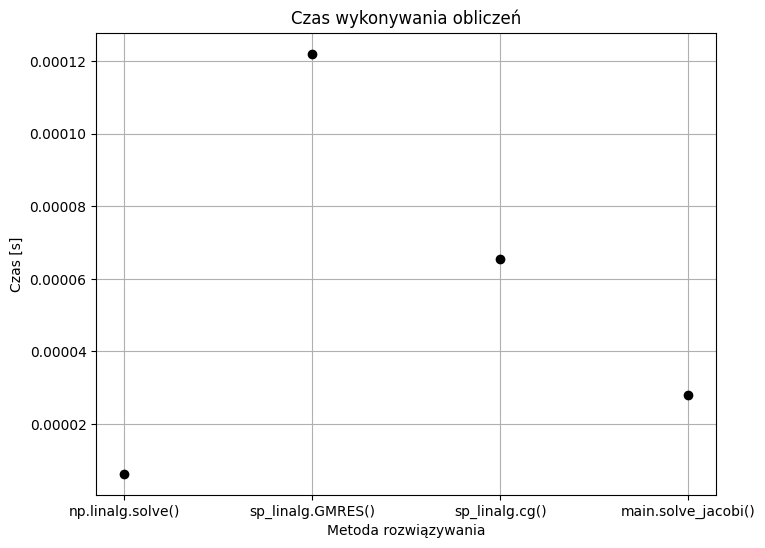

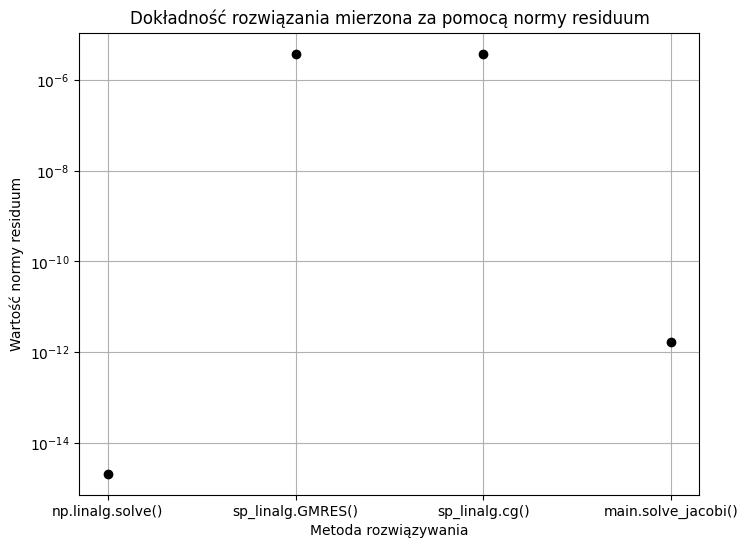

In [6]:
diagonal = [10**8 for _ in range(m)]
A3 += np.diag(diagonal)
times = []
residuums = []
xticks = ['np.linalg.solve()', 'sp_linalg.GMRES()', 'sp_linalg.cg()', 'main.solve_jacobi()']

time = %timeit -r 10 -n 5 -o np.linalg.solve(A3, b3)
times.append(time.average)
x_solve = np.linalg.solve(A3, b3)
residuum = helper_main.residual_norm(A3, x_solve, b3)
residuums.append(residuum)

time = %timeit -r 10 -n 5 -o sp_linalg.gmres(A3, b3)
times.append(time.average)
x_gmres, info = sp_linalg.gmres(A3, b3)
residuum = helper_main.residual_norm(A3, x_gmres, b3)
residuums.append(residuum)

time = %timeit -r 10 -n 5 -o sp_linalg.cg(A3, b3)
times.append(time.average)
x_gradient, info = sp_linalg.cg(A3, b3)
residuum = helper_main.residual_norm(A3, x_gradient, b3)
residuums.append(residuum)

time = %timeit -r 10 -n 5 -o main.solve_jacobi(A3, b3, np.zeros(shape=m))
times.append(time.average)
x_jacobi, nr_of_iterations = main.solve_jacobi(A3, b3, np.zeros(shape=m))
residuum = helper_main.residual_norm(A3, x_jacobi, b3)
residuums.append(residuum)

plt.figure(figsize=(8, 6))
plt.plot(xticks, times, 'ko')
plt.title('Czas wykonywania obliczeń')
plt.ylabel('Czas [s]')
plt.xlabel('Metoda rozwiązywania')
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(xticks, residuums, 'ko')
plt.title('Dokładność rozwiązania mierzona za pomocą normy residuum')
plt.ylabel('Wartość normy residuum')
plt.xlabel('Metoda rozwiązywania')
plt.grid()
plt.semilogy()
plt.show()

W tym przypadku na samym początku dodałem do mojej macierzy symetrycznej A3 macierz diagonalną z elementami rzędu $10^8$ by uzyskać macierz współczynników, która jest symetryczna, dodatnio określona oraz diagonalnie zdominowana. Ten zabieg umożliwił mi skorzystanie z wszystkich 4 metod rozwiązywania o których wspomniano w poleceniu. Najlepszymi metodami pod względem zarówno czasu wykonywania obliczeń jak i dokładności wyznaczonego rozwiązania są metoda solve oraz solve_jacobi. Zwracają one dużo dokładniejsze rozwiązanie niż pozostałe dwie funkcje, dodatkowo robią to w dużo krótszym czasie.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)